# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0382 Крючков Артем и Афанасьев Назар. Вариант №10.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

**Дискретные фильтры** — фильтры, выполняющие преобразование спектра сигнала за счет различного коэффициента передачи для разных гармонических составляющих:

$$y_n = \sum_{k=0}^{N}c_kx_{n-k}-\sum_{k=1}^{M}d_ky_{n-k}$$

**Рекурсивный фильтр** — дискретный фильтр с обратной связью.

При $x_n=Ae^{i\omega n}$ и $y_n=Be^{i\omega n}$ передаточная функция нерекурсивного фильтра имеет вид:

$$H(w)=\frac{B}{A}=\frac{\sum_{k=0}^{N}c_ke^{-i\omega k}}{1-\sum_{k=1}^{M}d_ke^{-i\omega k}} \qquad y_n=H(w)x_n$$

При записи через циклическую частоту $f$ передаточная функция выглядит следующим образом:

$$\tilde{H}(f)=H(2\pi f)=H(\omega)$$


**Формула трапеций**: 

$$y_{n+1}=y_n+\frac{1}{2}\left(s_n+s_{n+1}\right), \quad y_0=0$$

**Формула Симпсона**:

$$y_{n+1}=y_{n-1}+\frac{1}{3}\left(s_{n-1}+4 s_n+s_{n+1}\right), \quad y_0=0 $$

**Формула прямоугольников**:

$$y_{n+1}=y_n+s_{n+\frac{1}{2}}, \quad y_0=0$$

**Формула интегрирования по правилу 3/8**:

$$y_{n+2}=y_{n-1}+\frac18 (x_{n+2}+3x_{n+1}+3x_{n}+x_{n-1}), \quad y_0=0$$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

Импорт необходимых модулей и определение констант

In [112]:
import matplotlib.pyplot as plt
import numpy as np

f = np.linspace(1e-10, 0.5, 200)

### Задание 1

Была выведена *передаточная функция фильтра для формулы трапеции*:

$y_{n+1}=y_n+\frac{1}{2}\left(s_n+s_{n+1}\right), \quad y_0=0$

$s_n=e^{i \omega n}, \quad y_n=H(w)x_n $

$H(w)e^{i \omega (n+1)}=H(w)e^{i \omega n}+\frac{1}{2}(e^{i \omega n}+e^{i \omega (n+1)})$

$H(w)(e^{i \omega}-1)=\frac{1}{2}(1+e^{i \omega})$

$H(w)=\frac{e^{i \omega}+1}{2(e^{i \omega}-1)}=\frac{\cos (\frac{\omega}{2})}{2 i \sin (\frac{\omega}{2})}$

$\tilde{H}(f)=H(2\pi f)=\frac{\cos (\pi f)}{2 i \sin (\pi f)}$

Точное значение интеграла от $e^{i \omega t}$ равно $\frac{e^{i \omega t}}{i \omega}$

Отношения вычисляемого в результате фильтрации значения к истинному:

$
\gamma=\frac{\text { Вычисленное }}{\text { Точное }}=\cos \left(\frac{\omega}{2}\right) \frac{\left(\frac{\omega}{2}\right)}{\sin \left(\frac{\omega}{2}\right)}=\cos (\pi f) \frac{\pi f}{\sin (\pi f)}
$

По графику ниже можно видеть, что рекурсивный фильтр, соответствующий формуле трапеции, подавляет высокие частоты. Рост подавления является монотонным.

---

Была выведена *передаточная функция фильтра для формулы прямоугольников*:

$y_{n+1}=y_n+s_{n+\frac{1}{2}}, \quad y_0=0$

$s_n=e^{i \omega n}, \quad y_n=H(w)x_n $

$H(w)e^{i \omega (n+1)}=H(w)e^{i \omega n}+e^{i \omega (n+\frac12)}$

$H(w)(e^{i \omega}-1)=e^{0.5 i \omega}$

$H(w)=\frac{e^{0.5 i \omega}}{e^{i \omega}-1}=\frac1{2i \sin (\frac{\omega}2)}$

$\tilde{H}(f)=H(2\pi f)=\frac1{2i \sin (\pi f)}$

Точное значение интеграла от $e^{i \omega t}$ равно $\frac{e^{i \omega t}}{i \omega}$

Отношения вычисляемого в результате фильтрации значения к истинному:

$
\gamma=\frac{\text { Вычисленное }}{\text { Точное }}=\frac{(\frac{\omega}{2})}{\sin (\frac{\omega}{2})} = \frac{\pi f}{\sin (\pi f)}
$

По графику ниже можно видеть, что рекурсивный фильтр, соответствующий формуле прямоугольников, усиливает высокие частоты. Рост усиления является монотонным.

---

Была выведена *передаточная функция фильтра для формулы Симпсона*:

$y_{n+1}=y_{n-1}+\frac{1}{3}\left(s_{n-1}+4 s_n+s_{n+1}\right), \quad y_0=0 $

$s_n=e^{i \omega n}, \quad y_n=H(w)x_n $

$H(w)e^{i \omega (n+1)}=H(w)e^{i \omega (n-1)}+\frac{1}{3}(e^{i \omega (n-1)}+4e^{i \omega n}+e^{i \omega (n+1)})$

$H(w)(e^{i \omega}-e^{-i \omega})=\frac{1}{3}(4+e^{i \omega}+e^{-i \omega})$

$H(w)=\frac{4+e^{i \omega}+e^{-i \omega}}{3(e^{i \omega}-e^{-i \omega})}=\frac{\cos (\omega)+2}{3 i \sin (\omega)}$

$\tilde{H}(f)=H(2\pi f)=\frac{\cos (2 \pi f)+2}{3 i \sin (2 \pi f)}$

Точное значение интеграла от $e^{i \omega t}$ равно $\frac{e^{i \omega t}}{i \omega}$

Отношения вычисляемого в результате фильтрации значения к истинному:

$
\gamma=\frac{\text { Вычисленное }}{\text { Точное }}=\frac{2+\cos (\omega)}{3} \cdot \frac{\omega}{\sin \omega}=\frac{2+\cos (2 \pi f)}{3} \cdot \frac{2 \pi f}{\sin (2 \pi f)}
$

По графику ниже можно видеть, что рекурсивный фильтр, соответствующий формуле Симпсона, усиливает высокие частоты. Рост усиления является монотонным.

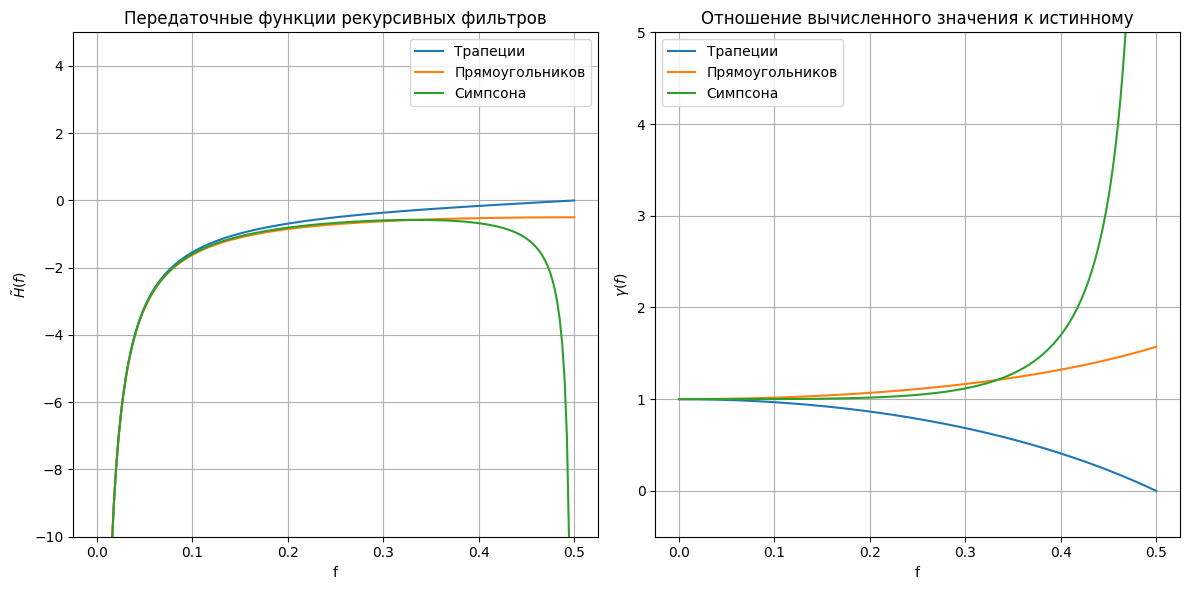

In [113]:
H_t = lambda f: (np.cos(np.pi*f) / (2j*np.sin(np.pi*f))).imag
H_r = lambda f: (1/(2j*np.sin(np.pi*f))).imag
H_s = lambda f: ((np.cos(2*np.pi*f) + 2) / (3j*np.sin(2 *np.pi*f))).imag

gamma_t = lambda f: np.cos(np.pi*f)*np.pi*f / np.sin(np.pi*f)
gamma_r = lambda f: np.pi*f / np.sin(np.pi*f)
gamma_s = lambda f: 2*np.pi*f*(2+np.cos(2*np.pi*f)) / np.sin(2*np.pi*f) / 3

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(f, H_t(f), label='Трапеции')
plt.plot(f, H_r(f), label='Прямоугольников')
plt.plot(f, H_s(f), label='Симпсона')
plt.ylim(-10, 5)
plt.title('Передаточные функции рекурсивных фильтров')
plt.grid(True)
plt.legend()
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')

plt.subplot(1, 2, 2)
plt.plot(f, gamma_t(f), label='Трапеции')
plt.plot(f, gamma_r(f), label='Прямоугольников')
plt.plot(f, gamma_s(f), label='Симпсона')
plt.ylim(-0.5, 5)
plt.title('Отношение вычисленного значения к истинному')
plt.grid(True)
plt.legend()
plt.xlabel('f')
plt.ylabel(r'$\gamma (f)$')

plt.tight_layout()
plt.show()

### Задание 2

Была выведена *передаточная функция фильтра для формулы интегрирования по правилу 3/8*:

$y_{n+2}=y_{n-1}+\frac18 (x_{n+2}+3x_{n+1}+3x_{n}+x_{n-1}), \quad y_0=0$

$s_n=e^{i \omega n}, \quad y_n=H(w)x_n $

$H(w)e^{i \omega (n+2)}=H(w)e^{i \omega (n-1)}+\frac{1}{8}(e^{i \omega (n+2)}+3e^{i \omega (n+1)}+3e^{i \omega n}+e^{i \omega (n+1)})$

$H(w)(e^{2i \omega}-e^{-i \omega})=\frac{1}{8}(e^{2i \omega}+3e^{i \omega}+3+e^{-i \omega})$

$H(w)=\frac{e^{2i \omega}+3e^{i \omega}+3+e^{-i \omega}}{8(e^{2i \omega}-e^{-i \omega})}=\frac{\cos (\frac{3\omega}2)+3 \cos (\frac{\omega}2)}{8i \sin (\frac{3\omega}2)}$

$\tilde{H}(f)=H(2\pi f)=\frac{\cos (3\pi f)+ 3 \cos (\pi f)}{8 i \sin (3\pi f)}$

Точное значение интеграла от $e^{i \omega t}$ равно $\frac{e^{i \omega t}}{i \omega}$

Отношения вычисляемого в результате фильтрации значения к истинному:

$
\gamma=\frac{\text { Вычисленное }}{\text { Точное }}=\frac1{12} (\cos (\frac{3\omega}2) + 3 \cos (\frac{\omega}2)) \cdot \frac{(\frac{3\omega}2)}{\sin (\frac{3\omega}2)} = \frac1{12} (\cos (3\pi f) + 3 \cos (\pi f)) \cdot \frac{3\pi f}{\sin (3\pi f)}
$

По графику ниже можно видеть, что рекурсивный фильтр, соответствующий формуле интегрирования по правилу 3/8, имеет два скачка в окрестности точки 0.334, где сигнал резко усиливается, а затем подавляется. На остальных промежутках сигнал подавляется, причём на промежутке после скачка он подавляетя сильнее. 

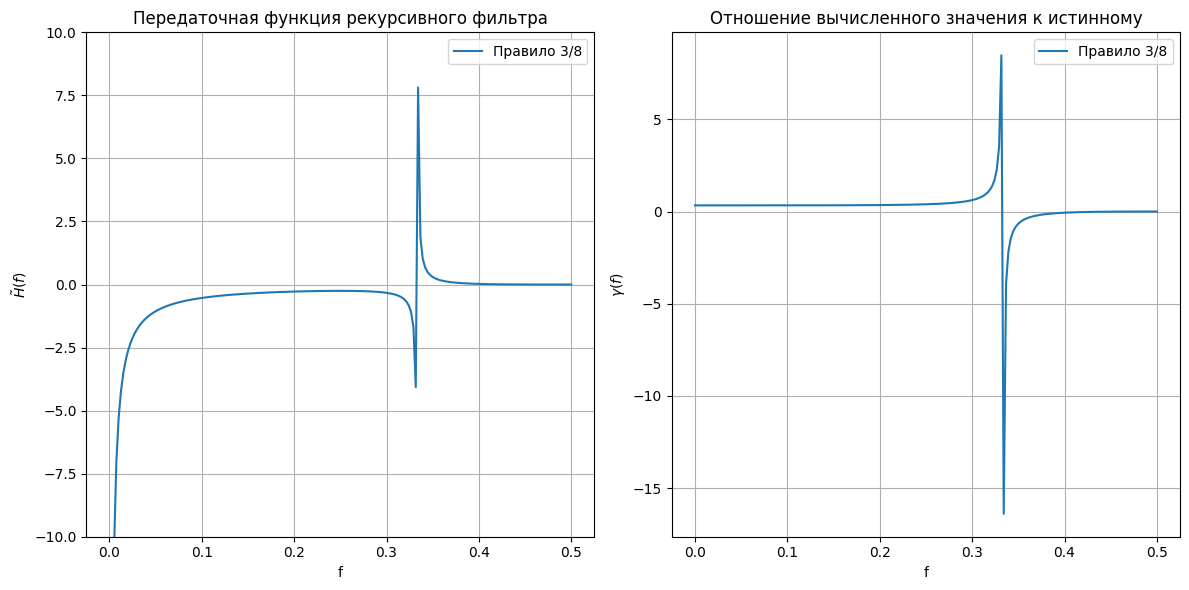

In [114]:
H_3_8 = lambda f: ((np.cos(3*np.pi*f)+3*np.cos(np.pi*f)) / (8j*np.sin(3*np.pi*f))).imag
gamma_3_8 = lambda f: (np.cos(3*np.pi*f) + 3*np.cos(np.pi*f))*(3*np.pi*f) / np.sin(3*np.pi*f) / 12

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(f, H_3_8(f), label='Правило 3/8')
plt.ylim(-10, 10) 
plt.title('Передаточная функция рекурсивного фильтра')
plt.grid(True)
plt.legend()
plt.xlabel('f')
plt.ylabel(r'$\tilde H(f)$')

plt.subplot(1, 2, 2)
plt.plot(f, gamma_3_8(f), label='Правило 3/8')
plt.title('Отношение вычисленного значения к истинному')
plt.grid(True)
plt.legend()
plt.xlabel('f')
plt.ylabel(r'$\gamma (f)$')

plt.tight_layout()
plt.show()

### Задание 3

Можно произвети сравнение всех перечисленных фильтров:

- Фильтры по формулам прямоугольников и Симпсона усиливают высокие частоты, причём формула Симпсона даёт более резкое усиление с большей амплитудой;
- Фильтр по формуле трапеций подавляет высокие частоты;
- Фильтр по правилу 3/8 имеет два скачка в окрестности частоты 0.334, где происходит резкое усиление, а затем подавление сигнала.
- Фильтры по формулам трапеций, прямоугольников и Симпсона имеют более плавное и монотонное изменение усиления/подавления, в отличие от фильтра по правилу 3/8, который имеет два резких скачка в окрестности одной точки.

## Выводы

В результате выполнения практической работы был проведён анализ частотных характеристик известных формул численного интегрирования. Для этих формул: формула трапеций, формула прямоугольников, формула Симпсона и формула интегрирования по правилу 3/8 — были выведены передаточные функции, а также выведены формулы для анализа отношений вычисленных и точных результатов интегрирования. По полученным данным были составлены графики зависимости значений передаточной функции и значений отношения вычисленных и точных результатов от частоты. По результатам анализа отдельных случаев был составлен сопоставительный анализ частотных характеристик всех изученных функций.